In [86]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [7]:
from tensorflow.keras.datasets import mnist

In [8]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


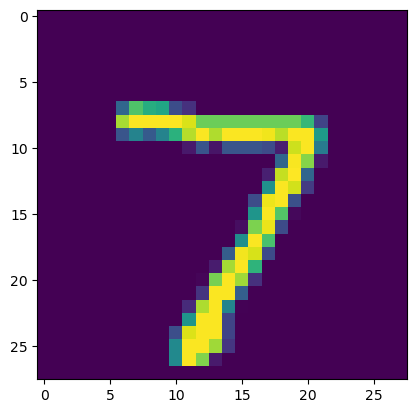

In [23]:
plt.imshow(x_test[0])

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [20]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [22]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [24]:
x_train.max()

255

In [25]:
x_train = x_train/255
x_test = x_test/255

In [28]:
x_train.shape

(60000, 28, 28)

In [31]:
#num_img , width , height , color_channel
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D ,Flatten , MaxPool2D

In [79]:
model = Sequential()

In [80]:
model.add(Conv2D(filters=32 , kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [81]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
early = EarlyStopping(monitor='val_loss',patience=2)

In [84]:
model.fit(x_train,y_cat_train, epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8907 - loss: 0.3631 - val_accuracy: 0.9809 - val_loss: 0.0616
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9831 - loss: 0.0522 - val_accuracy: 0.9832 - val_loss: 0.0507
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9891 - loss: 0.0343 - val_accuracy: 0.9860 - val_loss: 0.0417
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9875 - val_loss: 0.0411
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9880 - val_loss: 0.0386
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9959 - loss: 0.0145 - val_accuracy: 0.9860 - val_loss: 0.0461
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9965 - loss: 0.0104 - val_accuracy: 0.9887 - val_loss: 0.0434


In [61]:
metrics = pd.DataFrame(model.history.history)

In [62]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.948800,0.167754,0.9806,0.057262
1,0.983417,0.052825,0.9840,0.050383
2,0.988833,0.034990,0.9853,0.046331
3,0.992300,0.024954,0.9873,0.043237
4,0.994467,0.017488,0.9859,0.048919


<Axes: >

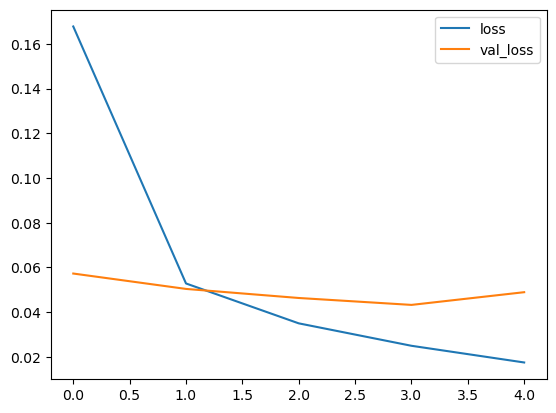

In [63]:
metrics[['loss','val_loss']].plot()

<Axes: >

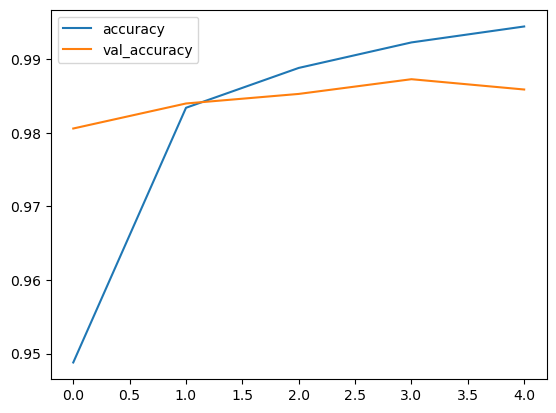

In [64]:
metrics[['accuracy','val_accuracy']].plot()

In [65]:
model.metrics_names

['loss', 'compile_metrics']

In [66]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0623


[0.048919450491666794, 0.9858999848365784]

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
preds = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [90]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [92]:
import seaborn as sns

<Axes: >

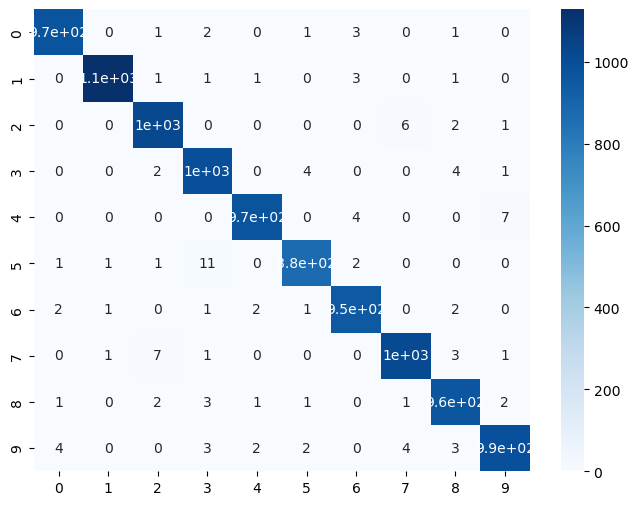

In [100]:
plt.figure(figsize=(8,6))
sns.heatmap(data = confusion_matrix(y_test,preds),annot=True,cmap='Blues')

In [110]:
np.argmax(model.predict(x_test[56].reshape(1,28,28,1)),axis=-1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


4

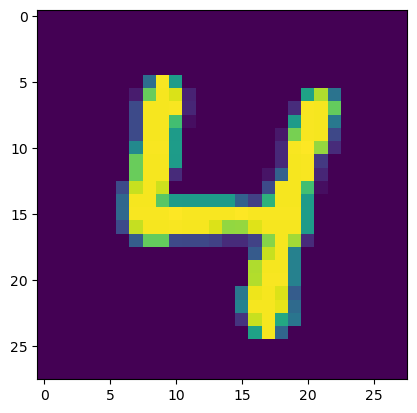

In [109]:
plt.imshow(x_test[56])